<h1>Nuclear Fusion: exercise 1</h1>

<p>Copyright (C) 2022 Universidad Politécnica de Madrid</p>
<p>Author: Manuel Cotelo Ferreiro (manuel.cotelo@upm.es)</p>

<h2>Collision equations</h2>

<h3>Introduction</h3>

<p>We can model a nuclear reaction as a inelastic collision of non-interaction particles. We are going to focus in binary collisions that results in two products. This model is useful to study the most common nuclear reactions as T(d,n)He4, D(d,n)He3, D(d,p)T or He3(d,n)He4.</p>
<p>The collision equations are based on the conservation equations: the mass-energy equation and the momentum equation. There are other conservation equations like the conservation of charge and the conservation of the number of nucleons. This last two equations will restrict the options for the product particles. We are goin to label the incident particles with 1 and 2 and the product particles as 3 and 4.</p>

\begin{align}
  E_{1} + E_{2} & = E_{3} + E_{4} \\
  \vec{p}_{1} + \vec{p}_{2} & = \vec{p}_{3} + \vec{p}_{4} \\
  Z_{1} + Z_{2} & = Z_{3} + Z_{4} \\
  A_{1} + A_{2} & = A_{3} + A_{4}
\end{align}

<p>where the energy $E$ is the total energy of the particle, it means the rest mass energy and the kinetic energy, $E = m \cdot c^{2} + K$. We can follow these steps to solve the problem.</p>

<ol>
    <li>Select the incident particles and products</li>
    <li>Check the conservation of charge and the conservation of the number of nucleons. If charge or nucleons are not conserved, discard the reaction and look for the correct products. Once we selected a valid reaction, we can forget about charge and nucleon conservation</li>
    <li>Compute the reaction heat $Q$. Remember that endotermic reactions ($Q < 0$) need a kinetic energy above a defined edge to happen. If the total kinetic energy is bellow that edge, then the reaction will not occur and the only solution is a scattering reaction.</li>
    <li>Decide the theory used to solve the equations: classical or relativistic</li>
    <li>Identify the free parameters</li>
    <li>Transform from laboratory frame (LAB) to center-of-mass frame (COM)</li>
    <li>Solve equations</li>
    <li>Transform back to LAB frame</li>
    <li>Check the solution</li>
</ol>

<h3>0. Define some utilities</h3>

In [2]:
import argparse
import itertools
import numpy

units = argparse.Namespace(
    mass = argparse.Namespace(
        amu_to_eV = 931.49406121e+06,
        amu_to_keV = 931.49406121e+03,
        amu_to_MeV = 931.49406121e+00,
    )
)

ks = argparse.Namespace(
    mass = 'mass_value',
    z = 'Z',
    a = 'A',
)

<h3>1. Select incident particles</h3>

<p>We select as target reaction T(d,n)He4</p>

In [3]:
import json

# name of nuclear data database
file_db = 'dbnuc.json'

# load database
db = json.load(open(file_db,'r'))

# define names of particles
nm1 = 'h2'
nm2 = 'h3'
nm3 = 'n1'
nm4 = 'he4'

# get mass of reactives from DB
m1 = db[nm1][ks.mass]*units.mass.amu_to_MeV # deuterium
m2 = db[nm2][ks.mass]*units.mass.amu_to_MeV # tritium

# get mass of products from DB
m3 = db[nm3][ks.mass]*units.mass.amu_to_MeV # neutron
m4 = db[nm4][ks.mass]*units.mass.amu_to_MeV # alpha

<h3>2. Check conservation of charge and nucleons</h3>

In [4]:
# get charge
z1, z2, z3, z4 = db[nm1][ks.z], db[nm2][ks.z], db[nm3][ks.z], db[nm4][ks.z]
zcons = (z1 + z2) - (z3 + z4)
print( f'# zcons = {zcons}')

# get nucleaons
a1, a2, a3, a4 = db[nm1][ks.a], db[nm2][ks.a], db[nm3][ks.a], db[nm4][ks.a]
acons = (a1 + a2) - (a3 + a4)
print( f'# acons = {acons}')

# zcons = 0
# acons = 0


<h3>3. Check reaction heat</h3>

In [5]:
# get reaction heat
q = (m1 + m2) - (m3 + m4)

print( f'# Q = {q:15.7e} MeV')

# Q =   1.7589402e+01 MeV


<h3>4. Select theory</h3>

<p>Next we have the form of the energy in both the classical theory and in the relativistic theory.</p> 

\begin{align}
  E_{cla} & = m_{0} \cdot c^{2} + K \\
  & = m_{0} \cdot c^{2} + \frac{p^{2}}{2 \cdot m_{0}} \\
  E_{rel} & = m_{0} \cdot c^{2} + K \\
  & = \sqrt{ \left( m_{0} \cdot c^{2} \right)^{2} + \left( p \cdot c \right)^{2} } \\
  & = m \cdot c^{2}
\end{align}

</p>Indeed, relativistic theory gives somehow a bit more complicated equations but it any case they can be solved with standard methods. Also, the frame transformation is more involved th relativistic theory and we recommend to start with clasical theory. Anycase, if we decide to use classical theory we must include some check to warn the user in case that we consider that the classical approach is not valid.</p>

<p>When the classical theory is valid? If we consider that $\sqrt{1 + x} \simeq 1 + x/2$ when $x$ is small... ($x \ll 1$)<p>
    
\begin{align}
    E & = \sqrt{ \left( m_{0} \cdot c^{2} \right)^{2} + \left( p \cdot c \right)^{2} } \\
    & = m_{0} \cdot c^{2} \sqrt{1 + \left( \frac{p \cdot c}{m_{0} \cdot c^{2} } \right)^{2} } \\
    & \simeq m_{0} \cdot c^{2} + \frac{p^{2}}{2 \cdot m_{0}}
\end{align}
    
<p>Then the condition is</p>

\begin{align}
\left( \frac{p \cdot c}{m_{0} \cdot c^{2} } \right)^{2} \ll 1 \\
\end{align}

<p>In classical theory $K = p^{2}/(2 \cdot m)$ and we can reformulate our criteria in a simpler way as</p>
\begin{align}
  \frac{K}{m_{0} \cdot c^{2}} \ll 1
\end{align}

<p>Hint: it is convenient to work with the momentum with energy units. Then, we will use our momentum as $p \cdot c$.</p>

In [6]:
# check criteria for validation of classical theory
k_lo = 1.e-3 # in MeV
k_hi = 1.e+3 # in MeV
k_num = 20
kin = numpy.exp(numpy.linspace(numpy.log(k_lo),numpy.log(k_hi),k_num))

r1 = kin/m1
r2 = kin/m2

r_tol = 1.e-3

# this shows a warning if the validation fails
import warnings
if not numpy.all( r1 < r_tol):
    warnings.warn('conditions for the application of classical theory are broken!!!')
# this stops the code if the validation fails
'''
assert numpy.all( r1 < t_tol), 'conditions for the application of classical theory are broken!!!'
'''

print( ''.join( [ f' {mi:15.7e} {ki:15.7e} {r1i:15.7e} {r2i:15.7e}\n' for mi, ki, r1i, r2i in zip(itertools.repeat(m1),kin,r1,r2) ], ), )

# for classical theory
import numpy

def random_sphere(num):
    u = 2.*numpy.random.random(num) - 1
    w = numpy.sqrt(1. - u*u)
    phi = 2.*numpy.pi*numpy.random.random(num)
    xs = numpy.array( [ w*numpy.cos(phi), w*numpy.sin(phi), u, ])
    return xs.T

def kin_from_mom(pc,m):
    return numpy.sum( pc*pc, axis=-1, )/m/2.

def random_mom_from_kin(k,m):
    p = numpy.sqrt(2.*m*k)
    return p[:,None]*random_sphere(p.size)

def energy_from_mom(pc,m):
    return m + kin_from_mom(pc)

def energy_from_kin(k,m):
    return m + k

def kin_from_energy(e,m):
    return e - m

def random_mom_from_energy(e,m):
    return random_mom_from_kin(kin_from_energy(e,m),m)


   1.8761239e+03   1.0000000e-03   5.3301385e-07   3.5594383e-07
   1.8761239e+03   2.0691381e-03   1.1028792e-06   7.3649694e-07
   1.8761239e+03   4.2813324e-03   2.2820095e-06   1.5239139e-06
   1.8761239e+03   8.8586679e-03   4.7217927e-06   3.1531882e-06
   1.8761239e+03   1.8329807e-02   9.7700410e-06   6.5243818e-06
   1.8761239e+03   3.7926902e-02   2.0215564e-05   1.3499847e-05
   1.8761239e+03   7.8475997e-02   4.1828793e-05   2.7933047e-05
   1.8761239e+03   1.6237767e-01   8.6549549e-05   5.7797332e-05
   1.8761239e+03   3.3598183e-01   1.7908297e-04   1.1959066e-04
   1.8761239e+03   6.9519280e-01   3.7054739e-04   2.4744959e-04
   1.8761239e+03   1.4384499e+00   7.6671371e-04   5.1200737e-04
   1.8761239e+03   2.9763514e+00   1.5864365e-03   1.0594139e-03
   1.8761239e+03   6.1584821e+00   3.2825562e-03   2.1920737e-03
   1.8761239e+03   1.2742750e+01   6.7920621e-03   4.5357032e-03
   1.8761239e+03   2.6366509e+01   1.4053714e-02   9.3849963e-03
   1.8761239e+03   5.4555

<ipython-input-6-09f8aea86eb3>:15: UserWarning: conditions for the application of classical theory are broken!!!
  warnings.warn('conditions for the application of classical theory are broken!!!')


<h3>5. Identify free parameters</h3>

<p>When we talk about a LTE (local thermodynamic equilibrium) plasma then we know the kinetic energy of the particles from the Maxwell's distribution and the temperature of the plasma. But we do not know anything about the trajectories. Then, we can define the moduli of the momentum with $K = p^{2}/(2m)$ but we have two free parameters to define the direction of traslation of the particle.</p>
<p>Next we are going to define the state of the indicent particles based on a defined kinetic energy and selecting the directions at random in a unit sphere.</p>

In [7]:
# examples
k1 = numpy.array( [ 1.e-2, ], ) # 10 keV
k2 = numpy.array( [ 2.e-2, ], ) # 20 keV

pc1 = random_mom_from_kin(k1,m1)
pc2 = random_mom_from_kin(k2,m2)

print( f'# k1 = {k1} MeV, pc1 = {pc1} MeV, |pc1| = {numpy.linalg.norm(pc1)}, pc1^2/(2m) = {kin_from_mom(pc1,m1)}') 
print( f'# k2 = {k2} MeV, pc2 = {pc2} MeV, |pc2| = {numpy.linalg.norm(pc2)}, pc2^2/(2m) = {kin_from_mom(pc2,m2)}') 
print()

# create a random sample of a uniform distribution of kinetic energy 
# between 1 keV and 21 keV 
sample = 1.e-3 + 20.e-3*numpy.random.random( ( 2, 8, ))
k1 = sample[0]
k2 = sample[1]

pc1 = random_mom_from_kin(k1,m1)
pc2 = random_mom_from_kin(k2,m2)

import itertools

print('# for particle 1:')
for ki, pci, mi in zip(k1,pc1,itertools.repeat(m1)):
    print( f'# k = {ki} MeV, pc = {pci} MeV, |pc| = {numpy.linalg.norm(pci)}, pc^2/(2m) = {.5*numpy.linalg.norm(pci)*numpy.linalg.norm(pci)/mi}') 
print()
    
print('# for particle 2:')
for ki, pci, mi in zip(k2,pc2,itertools.repeat(m2)):
    print( f'# k = {ki} MeV, pc = {pci} MeV, |pc| = {numpy.linalg.norm(pci)}, pc^2/(2m) = {.5*numpy.linalg.norm(pci)*numpy.linalg.norm(pci)/mi}') 
print()

# k1 = [0.01] MeV, pc1 = [[ 2.21793808 -5.7082566  -0.13796584]] MeV, |pc1| = 6.125559346496239, pc1^2/(2m) = [0.01]
# k2 = [0.02] MeV, pc2 = [[-1.82645556 -2.25515788 10.19586208]] MeV, |pc2| = 10.60081508425947, pc2^2/(2m) = [0.02]

# for particle 1:
# k = 0.004067799255736781 MeV, pc = [-2.68822595 -0.43599     2.80120412] MeV, |pc| = 3.9068389429900345, pc^2/(2m) = 0.004067799255736781
# k = 0.008082271628164998 MeV, pc = [ 4.25941415 -1.98970732 -2.86795071] MeV, |pc| = 5.506966985196546, pc^2/(2m) = 0.008082271628164998
# k = 0.017659198085695053 MeV, pc = [-3.5347571   5.09200934  5.27623153] MeV, |pc| = 8.14012812821894, pc^2/(2m) = 0.01765919808569506
# k = 0.003933661386081508 MeV, pc = [-2.33018531 -0.62426693  2.99008348] MeV, |pc| = 3.8418839141028926, pc^2/(2m) = 0.003933661386081509
# k = 0.01759126060546876 MeV, pc = [ 6.19555176 -4.01110557  3.396018  ] MeV, |pc| = 8.12445491635036, pc^2/(2m) = 0.017591260605468756
# k = 0.01650711239837192 MeV, pc = [-1.09261615  4.11

<p>Let's check the random sampling.</p>

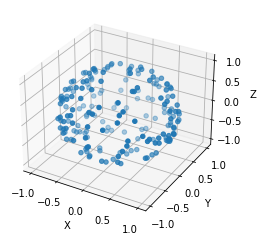

In [8]:
import matplotlib.pyplot as plt

xs = random_sphere(200)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs[:,0],xs[:,1],xs[:,2],marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim( [ -1.1, 1.1 ])
ax.set_ylim( [ -1.1, 1.1 ])
ax.set_zlim( [ -1.1, 1.1 ])

plt.show()

<h3>6. Transform to COM</h3>

<p>We have to compute the total momentum of the system and substract it to the particles</p>

\begin{align}
  \vec{p}_{tot} & = \sum \vec{p}_{i} = \vec{p}_{1} + \vec{p}_{2} \\
  & = m_{1} \cdot \vec{v}_{1} + m_{2} \cdot \vec{v}_{2} \\
  & = \left( m_{1} + m_{2} \right) \vec{v}_{COM} \\
   & \Rightarrow \vec{v}_{COM} = \vec{p}_{tot}/m_{tot}
\end{align}

<p>The transformations for the classical theory are:</p>

\begin{align}
  v_{1}^{COM} & = v_{1}^{LAB} - v_{COM} \\
  v_{2}^{COM} & = v_{2}^{LAB} - v_{COM} \\
\end{align}

<p>We are working with masses in energy units $m \cdot c^{2}$ and moreover we use momentums in energy units $p \cdot c$. Then, we will get the velocities in terms of the ratio of the velocity and $c$.</p>

\begin{align}
  \frac{v_{COM}}{c} &= \frac{p_{tot} c}{m_{0} c^{2}} \\
  c p_{1}^{COM} & = c p_{1}^{LAB} - m_{1}c^{2} \frac{v_{COM}}{c}
\end{align}

<p>In the COM frame we can assume that both incoident particles are moving along x-axis one against the other with the same momentum but opposite. Also, the problem is symmetric around the x-axis and then we can restrict the soplution to the xy-plane. This simplifies the problem but arises one extra free parameter due to the symmetry.</p>  

In [9]:
# transformations
def trans_mom_lab_to_com(m,pc_lab,vcom):
    return pc_lab - m*vcom

def trans_mom_com_to_lab(m,pc_com,vcom):
    return pc_com + m*vcom

# create a random sample of a uniform distribution of kinetic energy 
# between 1 keV and 21 keV 
num_samples = 16
k1_lab = 1.e-3 + 20.e-3*numpy.random.random( num_samples, )
k2_lab = 1.e-3 + 20.e-3*numpy.random.random( num_samples, )

pc1_lab = random_mom_from_kin(k1_lab,m1)
pc2_lab = random_mom_from_kin(k2_lab,m2)

e1_lab = energy_from_kin(k1_lab,m1)
e2_lab = energy_from_kin(k2_lab,m2)

# get properties of COM
mtot = m1 + m2    # rememmber this is m*c^2, in MeV
pctot_lab = pc1_lab + pc2_lab # remember, this is p*c, in MeV
vcom = pctot_lab/mtot # this is v/c, the ratio between the velocity and c, no units!!!

# transform
pc1_com = trans_mom_lab_to_com(m1,pc1_lab,vcom)
pc2_com = trans_mom_lab_to_com(m2,pc2_lab,vcom)

# check total momentum in COM frame
pctot_com = pc1_com + pc2_com
tol = 1.e-12
#assert numpy.all( numpy.linalg.norm( pctot_com, axis=-1, ) < tol ), "total momentum in COM frame is not 0.0!!!"

print( numpy.linalg.norm( pctot_com, axis=-1, ), )

[1.86107292e-15 1.33226763e-15 4.96506831e-16 4.44089210e-16
 8.32667268e-17 4.44089210e-16 8.88178420e-16 1.88411095e-15
 8.88178420e-16 5.43895982e-16 1.36877487e-15 9.93013661e-16
 6.28036983e-16 1.60118642e-15 6.28036983e-16 1.86107292e-15]


<h3>7. Solve the equations</h3>

<p>It is time to rewrite the cmass-energy equation and the momentum equation respect to the COM frame. Let's start with then energy equation.</p>

\begin{align}
E_{1} + E_{2} & = E_{3} + E_{4} \\
m_{1} c^{2} + K_{1} + m_{2} c^{2} + K_{2} & = m_{3} c^{2} + K_{3} + m_{4} c^{2} + K_{4} \\
\left(m_{1} + m_{2} - m_{3} - m_{4}\right) c^{2} + K_{1} + K_{2} & = K_{3} + K_{4} \\
\end{align}

<p>with $K = p^{2}/(2m)$ considering the momenum in the COM frame. At this point we must rememmber that both $K_{1}$ and $K_{2}$ are already known, they are the initial conditions of the collision. Then the left-hand side of the last equation is a constant. Then, we obtain an equationm that relates $p_{3}$ with $p_{4}$.</p>

\begin{align}
   A & = Q + K_{1} + K_{2} \\
   A & = \frac{p_{3}^{2}}{2 m_{3}} + \frac{p_{4}^{2}}{2 m_{4}}
\end{align}

<p>For the moment equation we have</p>

\begin{align}
  \vec{p}_{1} + \vec{p}_{2} & = \vec{p}_{3} + \vec{p}_{4} \\
  0 & = \vec{p}_{3} + \vec{p}_{4} \\
  & \Rightarrow \left\| p_{3} \right\| = \left\| p_{4} \right\|
\end{align}

<p>Then out energy equation atkes this form:</p>

\begin{align}
  p & = p_{3} = p_{4} \\
  2 A & = p^{2} \frac{m_{3} + m_{4}}{m_{3}m_{4}} \\
  \mu & = \frac{m_{3}m_{4}}{m_{3} + m_{4}} \\
  A & = \frac{p^{2}}{2 \mu} \\
  p & = \sqrt{2 \mu A }
\end{align}

In [10]:
# get kinetic energy in COM frame
k1_com = kin_from_mom(pc1_com,m1)
k2_com = kin_from_mom(pc2_com,m2)
a = q + k1_com + k2_com

assert numpy.all( a > 0. ), 'not enough kinetic energy for the reaction'

# get momentum of products
mu = m3*m4/(m3 + m4)
pc_com = numpy.sqrt(2.*mu*a)

k3_com = kin_from_mom(pc_com[:,None],m3)
k4_com = kin_from_mom(pc_com[:,None],m4)

# get momentum of products, take random direction (assume isotropic emission 
# of the product particles)
pc3_com = random_mom_from_kin(k3_com,m3)
pc4_com = -pc3_com

# validate results in the COM frame
e1_com = energy_from_kin(k1_com,m1)
e2_com = energy_from_kin(k2_com,m2)
e3_com = energy_from_kin(k3_com,m3)
e4_com = energy_from_kin(k4_com,m4)

de = 1. - (e3_com + e4_com)/(e1_com + e2_com)
print(de)
assert numpy.all( de < 1.e-12 ), 'Energy conservation in COM frame is broken'

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.22044605e-16 0.00000000e+00]


<h3>8. Transform back to LAB frame</h3>

In [11]:
pc3_lab = trans_mom_com_to_lab(m3,pc3_com,vcom)
pc4_lab = trans_mom_com_to_lab(m4,pc4_com,vcom)

k3_lab = kin_from_mom(pc3_lab,m3)
k4_lab = kin_from_mom(pc4_lab,m4)

print(k3_lab)
print(k4_lab)

# validate results in LAB frame
e1_lab = energy_from_kin(k1_lab,m1)
e2_lab = energy_from_kin(k2_lab,m2)
e3_lab = energy_from_kin(k3_lab,m3)
e4_lab = energy_from_kin(k4_lab,m4)

de = 1. - (e3_lab + e4_lab)/(e1_lab + e2_lab)
print(de)
assert numpy.all( numpy.abs(de) < 1.e-6 ), 'wrong solution of the collision equation, energy is not conserved!!!'

pc = (pc1_lab + pc2_lab) - (pc3_lab + pc4_lab)
pc_init = numpy.linalg.norm( pc1_lab + pc2_lab, axis=-1, )
dp = numpy.linalg.norm( pc, axis=-1, )/pc_init
print(dp)
#assert numpy.all( numpy.abs(dp) < 1.e-6 ), 'wrong solution of the collision equation, momentum is not conserved!!!'

[14.17986434 13.98105147 14.27512809 14.00888822 14.07274472 13.69217213
 14.24769877 13.65941167 14.42253758 14.37440086 13.97194746 14.35459496
 14.46078237 13.84366561 14.12745955 14.0192303 ]
[3.42707686 3.62571934 3.3382375  3.60176357 3.53417443 3.91875673
 3.36870198 3.96300196 3.19695211 3.22765116 3.62954314 3.25817797
 3.16033001 3.75952823 3.47861394 3.58837016]
[5.29470279e-09 7.99692390e-09 9.71266134e-09 1.03758594e-08
 2.27827912e-09 1.59396522e-08 5.57935786e-09 1.57033910e-08
 1.16410966e-08 8.39083458e-09 5.83899573e-09 1.27322115e-08
 1.21839540e-08 9.18752852e-09 9.28943322e-09 1.16649215e-08]
[0.00375396 0.00375396 0.00375396 0.00375396 0.00375396 0.00375396
 0.00375396 0.00375396 0.00375396 0.00375396 0.00375396 0.00375396
 0.00375396 0.00375396 0.00375396 0.00375396]


<h2>Applications</h2>